# Практическое задание

## Задачи

1. Написать свою реализацию метода главных компонент
с помощью сингулярного разложения с использованием функции
[numpy.linalg.svd()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)

2. Обучить любую модель классификации на датасете IRIS
до применения PCA и после него.
Сравнить качество классификации по отложенной выборке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from problem_1_pca import pca_eigens, pca_singulars, pca
from example_1_scatter import scatter

### Load dataset and make standardization

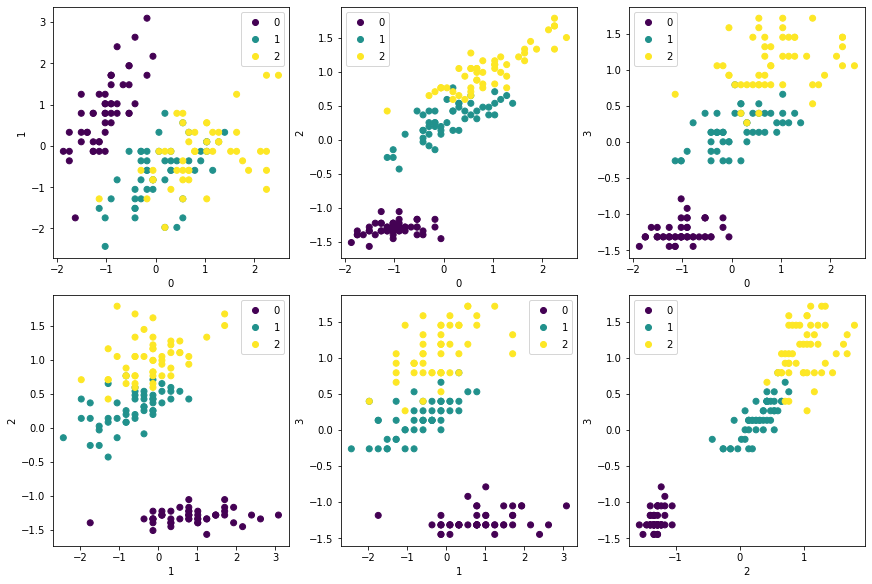

In [2]:
X, y = load_iris(return_X_y = True)
X = (X - X.mean(axis=0)) / X.std(axis=0)

scatter(X, y, ncols=3, figsize=(4, 4))

### Calculate PCA eigen and singular values

In [3]:
eigens = [_[0] for _ in pca_eigens(X)] 
normalized_eigens = [_ / sum(eigens) for _ in eigens]
cumsum_eigens = np.cumsum(normalized_eigens)

singulars = [_[0] for _ in pca_singulars(X)] 
normalized_singulars = [_ / sum(singulars) for _ in singulars]
cumsum_singulars = np.cumsum(normalized_singulars)

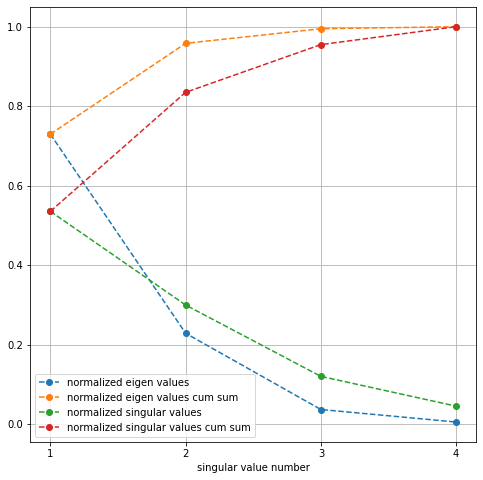

In [4]:
value_numbers = range(1, len(eigens) + 1)

_, axis = plt.subplots(figsize=(8, 8))

axis.plot(
    value_numbers, normalized_eigens,
    'o--', label='normalized eigen values'
)

axis.plot(
    value_numbers, cumsum_eigens,
    'o--', label='normalized eigen values cum sum'
)
axis.plot(
    value_numbers, normalized_singulars,
    'o--', label='normalized singular values'
)

axis.plot(
    value_numbers, cumsum_singulars,
    'o--', label='normalized singular values cum sum'
)

axis.set(
    xticks=value_numbers,
    xlabel='singular value number'
)
axis.grid()
axis.legend()

plt.show()

### Make PCA

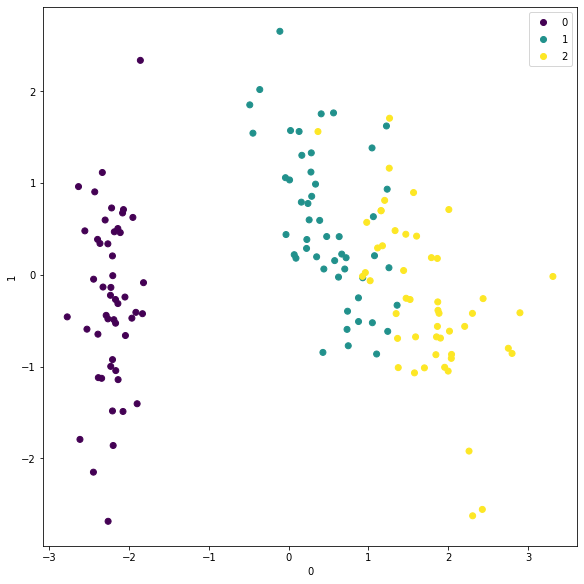

In [5]:
Z = pca(X, d=2)

scatter(Z, y, figsize=(8, 8))